<a href="https://colab.research.google.com/github/qli447/Poforlio/blob/main/GB_840_NLP_(class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing Text with the Natural Language Toolkit (NLTK)

## Load the appropriate libraries.

We'll scrape the novel from the website Project Gutenberg using the Python package *requests*. Then we'll extract words from this web data using BeautifulSoup. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (NLTK).

In [ ]:
# Load the appropriate libraries.
import nltk
import requests
from bs4 import BeautifulSoup

# Download packages in the NLTK.
nltk.download(['stopwords',
               'wordnet',
               'averaged_perceptron_tagger',
               'universal_tagset',
               'tagsets'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

## Request the HTML file.

To fetch the HTML file with a Tale of Two Cities, we're going to use the request package to make a GET request for the website, which means we're getting data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page using Python instead.

In [ ]:
# Get the "Tale of Two Cities" HTML.
r = requests.get('https://www.gutenberg.org/files/98/98-h/98-h.htm')

# Set the correct text encoding of the HTML page.
r.encoding = 'utf-8'

# Extract the HTML from the request object.
html = r.text

# Print a selection of characters in the HTML.
print(html[0:406])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg EBook of A Tale of Two Cities, by Charles Dickens</title>


## Get text from the HTML.

This HTML is not quite what we want. However, it does contain what we want: the text of a Tale of Two Cities. What we need to do now is wrangle this HTML to extract the text of the novel. For this we'll use the package BeautifulSoup.

Firstly, a word on the name of the package: In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called BeautifulSoup.

In [ ]:
# Create a BeautifulSoup object from the HTML.
soup = BeautifulSoup(html)

# Get the text out of the soup.
text = soup.get_text()

# Printing out some of the text characters.
# print(text[0:500])
print(text[33000:33700])

CHAPTER IV.The Preparation
    
When the mail got successfully to Dover, in the course of the forenoon,
      the head drawer at the Royal George Hotel opened the coach-door as his
      custom was. He did it with some flourish of ceremony, for a mail journey
      from London in winter was an achievement to congratulate an adventurous
      traveller upon.
    

      By that time, there was only one adventurous traveller left be
      congratulated: for the two others had been set down at their respective
      roadside destinations. The mildewy inside of the coach, with its damp and
      dirty straw, its disagreeable smell, and its obscurity, was rather like a
      larger dog


 ## Tokenize the text.
 
We'll now tokenize the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.

*A NOTE ABOUT REGULAR EXPRESSIONS*

To split off the parts off the text that are separated by whitespaces, we will use regular expressions. A regular expression, or regex for short, is a sequence of characters that define a search pattern. They are notoriously confusing.  The '\w' is a special expression that will find word characters.  The '+' tells you that the previous character in the regex can appear as many times as you want in strings that you're trying to match.

In [ ]:
# Create a tokenizer.
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenize the text.
tokens = tokenizer.tokenize(text)

# Print out the first 8 words (tokens).
print(tokens[0:8])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'A', 'Tale', 'of']


## Make the words lowercase.

Now, we want to ensure that the same words -- whether capitalized or not -- are treating as the same word (e.g. tale or Tale).

In [ ]:
# Create a new list to hold the lowercased words.
lower_words = []

# Loop through the tokens and make them lower case.
for word in tokens:
    lower_words.append(word.lower())

# Printing out the first 8 words / tokens 
print(lower_words[0:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'a', 'tale', 'of']


## Load in stop words.

It is common practice to remove words that appear a lot in the English language such as 'the', 'of', and 'a' because they aren't very interesting. These are known as stop words. The package NLTK includes a good list of stop words in English that we can use.

In [ ]:
# Get the English stop words from NLTK.
stop_words = nltk.corpus.stopwords.words('english')

# Print out the first eight stop words.
print(stop_words[0:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


## Remove the stop words.

In [ ]:
# Create a new list to hold the book without stop words.
filtered_words = []

# Append to "filtered_words" all words that are in "lower_words" but not stop words.
for word in lower_words:
    if word not in stop_words:
        filtered_words.append(word)

# Print the first 5 filtered words to check that stop words have been removed.
print(filtered_words[0:5])

['project', 'gutenberg', 'ebook', 'tale', 'two']


## Lexicon Normalization

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting would all reduce to a common word, "connect". It reduces derivatives of a word to a common root word.

#### Lemmatization

Lemmatization reduces words to their base word, which are linguistically correct lemmas. It uses vocabulary and morphological analysis. For example, The word "better" has "good" as its lemma.

In [ ]:
# Import the lemmatizer library.
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Create a new list to hold the lemmed words.
lemmed_words = []

# Lemmatize each word and store it in our lemmed_words variable.
for word in filtered_words:
  lemmed_words.append(lemmatizer.lemmatize(word))

# Print the first 8 lemmatized words.
print(lemmed_words[0:8])

['project', 'gutenberg', 'ebook', 'tale', 'two', 'city', 'charles', 'dickens']


## Tag "parts of speech (POS)".

In English the main parts of speech are noun, pronoun, adjective, determiner, verb, adverb, preposition, conjunction, and interjection.


In [ ]:
# Create a new list to store words with their parts of speech (POS).
pos_words = nltk.pos_tag(lemmed_words)

# Print parts of speech for a sample of words.
print(pos_words[2000:2010])

[('state', 'NN'), ('richest', 'RBS'), ('merchant', 'NN'), ('london', 'VBD'), ('three', 'CD'), ('passenger', 'NN'), ('shut', 'VBD'), ('narrow', 'JJ'), ('compass', 'NN'), ('one', 'CD')]


In [ ]:
# Evaluate the POS abbreviation.
# NN, JJ, etc.
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


## Calculate the most frequent words.

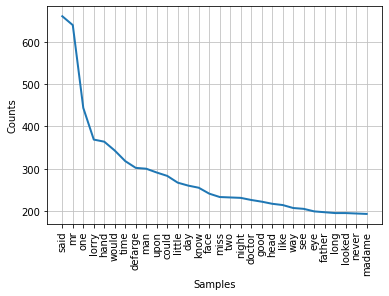

In [ ]:
# Creating the word frequency distribution
freqdist = nltk.FreqDist(lemmed_words)

# Plotting the word frequency distribution
freqdist.plot(30)

## BONUS - Write a function to perform this analysis on other books.

In [ ]:
def plot_word_freq(url):
  # Pull the HTML page.
  r = requests.get(url)
  # Set the correct text encoding of the HTML page.
  r.encoding = 'utf-8'
  # Extract the HTML from the request object.
  html = r.text
  # Create a BeautifulSoup object from the HTML.
  soup = BeautifulSoup(html)
  # Get the text out of the soup.
  text = soup.get_text()
  # Create a tokenizer.
  tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
  # Tokenize the text.
  tokens = tokenizer.tokenize(text)
  # Create a new list to hold the lowercased words.
  lower_words = []
  # Loop through the tokens and make them lower case.
  for word in tokens:
    lower_words.append(word.lower())
  # Get the English stop words from NLTK.
  stop_words = nltk.corpus.stopwords.words('english')
  # Create a new list to hold the book without stop words.
  filtered_words = []
  # Append to "filtered_words" all words that are in "lower_words" but not stop words.
  for word in lower_words:
    if word not in stop_words:
        filtered_words.append(word)
  # Setup the lemmatizer.
  lemmatizer = WordNetLemmatizer()
  # Create a new list to hold the lemmed words.
  lemmed_words = []
  # Lemmatize each word and store it in our lemmed_words variable.
  for word in filtered_words:
    lemmed_words.append(lemmatizer.lemmatize(word))
  # Creating the word frequency distribution
  freqdist = nltk.FreqDist(filtered_words)
  # Plotting the word frequency distribution
  freqdist.plot(30)

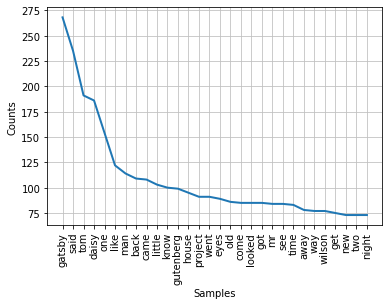

In [ ]:
# Use the funcion to plot word count frequences for another book ("Great Gatsby")
plot_word_freq('https://www.gutenberg.org/files/64317/64317-h/64317-h.htm')

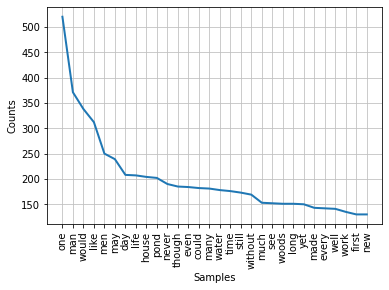

In [ ]:
# Use the funcion to plot word count frequences for another book ("Walden")
plot_word_freq('https://www.gutenberg.org/files/205/205-h/205-h.htm')

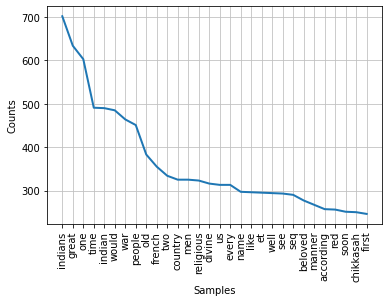

In [ ]:
# Add another book. (Adair's History of the American Indians, by James Adair)
plot_word_freq('https://www.gutenberg.org/files/67699/67699-h/67699-h.htm')

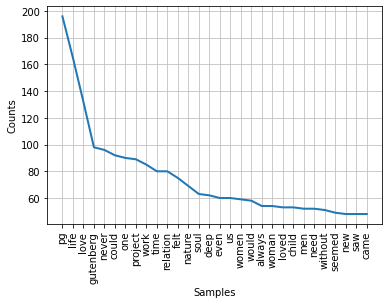

In [ ]:
# Add another book. (The Story of a Lover, by Hutchins Hapgood)
plot_word_freq('https://www.gutenberg.org/files/67706/67706-h/67706-h.htm')

# PART 2A - PERFORMING SENTIMENT ANALYSIS WITH NLTK/VADER

In [ ]:
# Download the appropriate libraries/packages.
import pandas as pd
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
# Test the sentiment analyzer.
analyzer = SentimentIntensityAnalyzer()
review = 'This was a good movie.'
analyzer.polarity_scores(review)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

The Positive, Negative, and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 49% Positive, 51% Neutral, and 0% Negative. All these should add up to 1.

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalizing to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence.

In [ ]:
# Test the sentiment analyzer.
analyzer = SentimentIntensityAnalyzer()
review = 'This was a good movie!'
analyzer.polarity_scores(review)

{'compound': 0.4926, 'neg': 0.0, 'neu': 0.484, 'pos': 0.516}

In [ ]:
# Test the sentiment analyzer.
analyzer = SentimentIntensityAnalyzer()
review = 'This was a HORRIBLE movie!'
analyzer.polarity_scores(review)

{'compound': -0.6731, 'neg': 0.601, 'neu': 0.399, 'pos': 0.0}

In [ ]:
# Read the CSV file into a dataframe.
url = 'http://bit.ly/park-reviews'
df_reviews = pd.read_csv(url)
df_reviews.head()

,Review_Text,Branch
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
# Generate a sentiment score for each review.
analyzer = SentimentIntensityAnalyzer()
df_reviews['Sentiment Scores'] = df_reviews['Review_Text'].apply(lambda review: analyzer.polarity_scores(review))
df_reviews.head()

,Review_Text,Branch,Sentiment Scores
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,Disneyland_HongKong,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...",Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."


A lambda function is a small function containing a single expression. Lambda functions can also act as anonymous functions where they don’t require any name. These are very helpful when we have to perform small tasks with less code.


In [ ]:
# Extract the compound sentiment score.
df_reviews['Compound Score']  = df_reviews['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])
df_reviews.head()

,Review_Text,Branch,Sentiment Scores,Compound Score
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,Disneyland_HongKong,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...",Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846


In [ ]:
# Generate a sentiment rating based on the compound score.
df_reviews['Sentiment Rating'] = df_reviews['Compound Score'].apply(lambda c: 'Positive' if c >= 0 else 'Negative')
df_reviews.head()

,Review_Text,Branch,Sentiment Scores,Compound Score,Sentiment Rating
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,Positive
1,Its been a while since d last time we visit HK...,Disneyland_HongKong,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,Positive
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,Positive
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,Positive
4,"the location is not in the city, took around 1...",Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,Positive


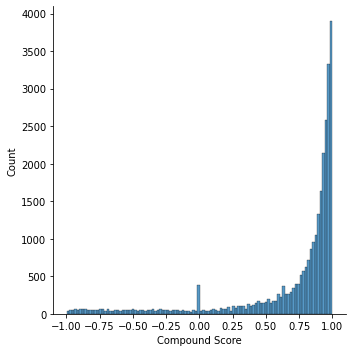

In [ ]:
# Plot the distribution of compound scores.
sns.displot(data=df_reviews, x="Compound Score");

# PART 2B - ADDITIONAL PRACTICE WITH VADER

In [ ]:
# Perform sentiment analysis on the dataset below using VADER:
# https://bit.ly/hotels_reviews

In [ ]:
# Read the CSV file into a dataframe.
url = 'https://bit.ly/hotels_reviews'
df_reviews = pd.read_csv(url)
df_reviews.head()

,hotel_review
0,Pleasant 10 min walk along the sea front to th...
1,Really lovely hotel. Stayed on the very top fl...
2,We stayed here for four nights in October. The...
3,We loved staying on the island of Lido! You ne...
4,Lovely view out onto the lagoon. Excellent vie...


In [ ]:
# Generate a sentiment score for each review.
analyzer = SentimentIntensityAnalyzer()
df_reviews['Sentiment Scores'] = df_reviews['hotel_review'].apply(lambda review: analyzer.polarity_scores(review))
df_reviews.head()

,hotel_review,Sentiment Scores
0,Pleasant 10 min walk along the sea front to th...,"{'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'co..."
1,Really lovely hotel. Stayed on the very top fl...,"{'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'comp..."
2,We stayed here for four nights in October. The...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp..."
3,We loved staying on the island of Lido! You ne...,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp..."
4,Lovely view out onto the lagoon. Excellent vie...,"{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp..."


In [ ]:
# Extract the compound sentiment score.
df_reviews['Compound Score']  = df_reviews['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])
df_reviews.head()

,hotel_review,Sentiment Scores,Compound Score
0,Pleasant 10 min walk along the sea front to th...,"{'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'co...",0.8299
1,Really lovely hotel. Stayed on the very top fl...,"{'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'comp...",0.9828
2,We stayed here for four nights in October. The...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9643
3,We loved staying on the island of Lido! You ne...,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",0.9779
4,Lovely view out onto the lagoon. Excellent vie...,"{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...",0.9217


In [ ]:
# Generate a sentiment rating based on the compound score.
df_reviews['Sentiment Rating'] = df_reviews['Compound Score'].apply(lambda c: 'Positive' if c >= 0 else 'Negative')
df_reviews.head()

,hotel_review,Sentiment Scores,Compound Score,Sentiment Rating
0,Pleasant 10 min walk along the sea front to th...,"{'neg': 0.052, 'neu': 0.695, 'pos': 0.252, 'co...",0.8299,Positive
1,Really lovely hotel. Stayed on the very top fl...,"{'neg': 0.019, 'neu': 0.5, 'pos': 0.481, 'comp...",0.9828,Positive
2,We stayed here for four nights in October. The...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9643,Positive
3,We loved staying on the island of Lido! You ne...,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",0.9779,Positive
4,Lovely view out onto the lagoon. Excellent vie...,"{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...",0.9217,Positive


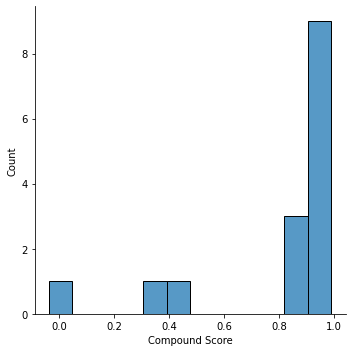

In [ ]:
# Plot the distribution of compound scores.
sns.displot(data=df_reviews, x="Compound Score");